# Bitcoin Present Price Prediction

### Import relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

### Loading Financial Data and Time Frame

In [2]:
crypto_currency = 'BTC'
against_cryptocurrency = 'USD'

start = dt.datetime(2018,1,1)
end = dt.datetime.now()

data =  web.DataReader(f'{crypto_currency}-{against_cryptocurrency}', 'yahoo', start, end)


### Preparing Data

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Neural Network Model

In [4]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
45/45 [==============================] - 16s 103ms/step - loss: 0.0161
Epoch 2/25
45/45 [==============================] - 5s 101ms/step - loss: 0.0034
Epoch 3/25
45/45 [==============================] - 5s 101ms/step - loss: 0.0035
Epoch 4/25
45/45 [==============================] - 5s 101ms/step - loss: 0.0037
Epoch 5/25
45/45 [==============================] - 5s 103ms/step - loss: 0.0034
Epoch 6/25
45/45 [==============================] - 5s 101ms/step - loss: 0.0032
Epoch 7/25
45/45 [==============================] - 5s 103ms/step - loss: 0.0029
Epoch 8/25
45/45 [==============================] - 5s 102ms/step - loss: 0.0028
Epoch 9/25
45/45 [==============================] - 5s 106ms/step - loss: 0.0024
Epoch 10/25
45/45 [==============================] - 5s 105ms/step - loss: 0.0023
Epoch 11/25
45/45 [==============================] - 5s 102ms/step - loss: 0.0028
Epoch 12/25
45/45 [==============================] - 5s 101ms/step - loss: 0.0028
Epoch 13/25
45/45 [=====

### Testing the Model

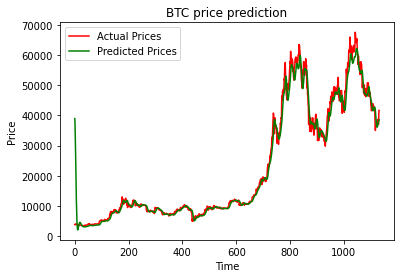

In [5]:
test_start = dt.datetime(2019,1,1)
test_end = dt.datetime.now()

test_data =  web.DataReader(f'{crypto_currency}-{against_cryptocurrency}', 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis = 0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

plt.plot(actual_prices, color='red', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()